# Лабораторная №3. Линейная регрессия

## Описание датасета из источника

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

## Получение данных

In [ ]:
import pandas as pd

data = pd.read_csv('/content/housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


##  Получение и отображение статистики
Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили)

### Кодирование категориального признака `ocean_proximity`
Выведем все категории:

In [ ]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Признак - мультиклассовый, поэтому введём для каждого элемента из массива новый параметр (столбец)

In [ ]:
data = pd.get_dummies(
    data,
    columns=['ocean_proximity'],
    drop_first=True
)
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,0,0,0


In [ ]:
statistics = data.describe()
statistics

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000


Визуализация

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

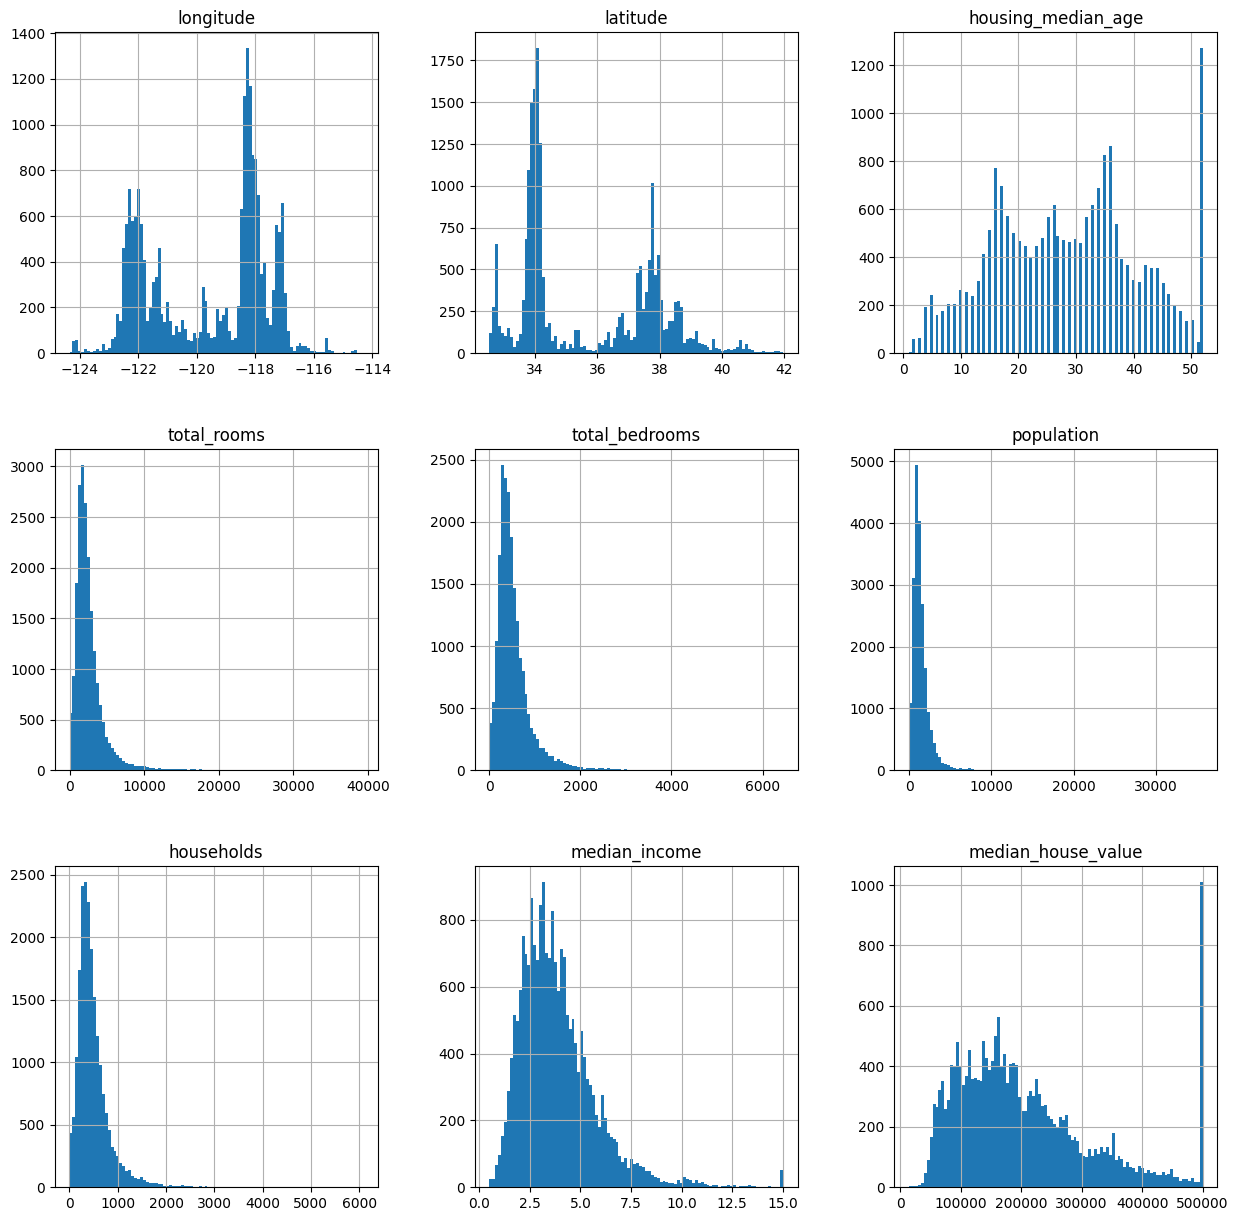

In [ ]:
data.hist(bins = 100, figsize = (15, 15))

# Количество
|                            |     0 |
|:---------------------------|------:|
| longitude                  | 20640 |
| latitude                   | 20640 |
| housing_median_age         | 20640 |
| total_rooms                | 20640 |
| total_bedrooms             | 20433 |
| population                 | 20640 |
| households                 | 20640 |
| median_income              | 20640 |
| median_house_value         | 20640 |
| ocean_proximity_INLAND     | 20640 |
| ocean_proximity_ISLAND     | 20640 |
| ocean_proximity_NEAR BAY   | 20640 |
| ocean_proximity_NEAR OCEAN | 20640 |


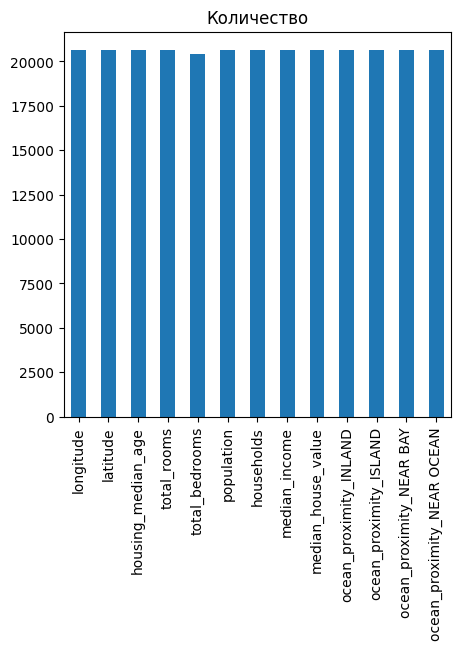

# Средние значения признаков
|                            |                0 |
|:---------------------------|-----------------:|
| longitude                  |   -119.57        |
| latitude                   |     35.6319      |
| housing_median_age         |     28.6395      |
| total_rooms                |   2635.76        |
| total_bedrooms             |    537.871       |
| population                 |   1425.48        |
| households                 |    499.54        |
| median_income              |      3.87067     |
| median_house_value         | 206856           |
| ocean_proximity_INLAND     |      0.317393    |
| ocean_proximity_ISLAND     |      0.000242248 |
| ocean_proximity_NEAR BAY   |      0.11095     |
| ocean_proximity_NEAR OCEAN |      0.128779    |


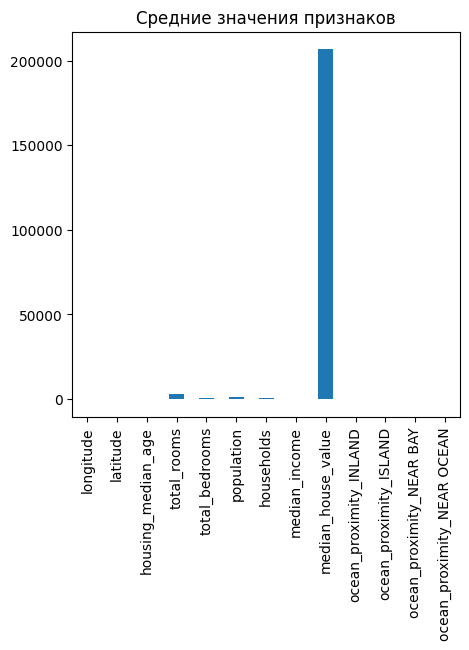

# Стандартные отклонения признаков
|                            |              0 |
|:---------------------------|---------------:|
| longitude                  |      2.00353   |
| latitude                   |      2.13595   |
| housing_median_age         |     12.5856    |
| total_rooms                |   2181.62      |
| total_bedrooms             |    421.385     |
| population                 |   1132.46      |
| households                 |    382.33      |
| median_income              |      1.89982   |
| median_house_value         | 115396         |
| ocean_proximity_INLAND     |      0.465473  |
| ocean_proximity_ISLAND     |      0.0155628 |
| ocean_proximity_NEAR BAY   |      0.314077  |
| ocean_proximity_NEAR OCEAN |      0.334963  |


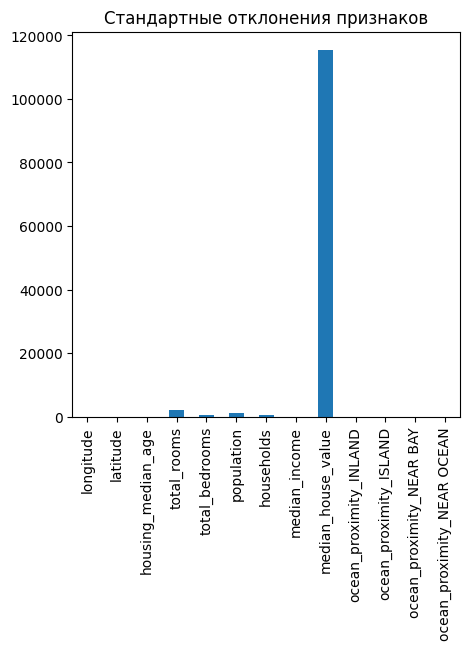

# Минимум
|                            |          0 |
|:---------------------------|-----------:|
| longitude                  |  -124.35   |
| latitude                   |    32.54   |
| housing_median_age         |     1      |
| total_rooms                |     2      |
| total_bedrooms             |     1      |
| population                 |     3      |
| households                 |     1      |
| median_income              |     0.4999 |
| median_house_value         | 14999      |
| ocean_proximity_INLAND     |     0      |
| ocean_proximity_ISLAND     |     0      |
| ocean_proximity_NEAR BAY   |     0      |
| ocean_proximity_NEAR OCEAN |     0      |


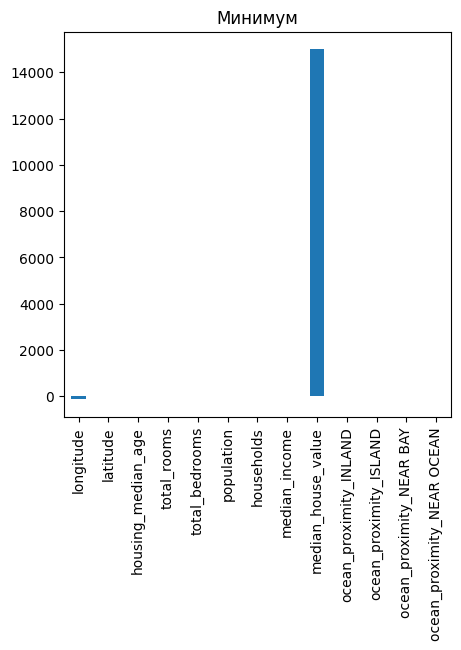

# Максимум
|                            |           0 |
|:---------------------------|------------:|
| longitude                  |   -114.31   |
| latitude                   |     41.95   |
| housing_median_age         |     52      |
| total_rooms                |  39320      |
| total_bedrooms             |   6445      |
| population                 |  35682      |
| households                 |   6082      |
| median_income              |     15.0001 |
| median_house_value         | 500001      |
| ocean_proximity_INLAND     |      1      |
| ocean_proximity_ISLAND     |      1      |
| ocean_proximity_NEAR BAY   |      1      |
| ocean_proximity_NEAR OCEAN |      1      |


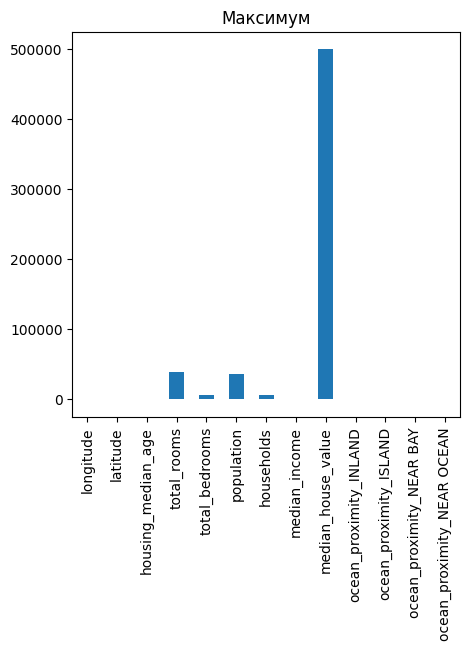

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [5, 5]

print('# Количество')
data_count = data.count()
data_count.plot(kind='bar', title='Количество')
print(data_count.to_markdown())
plt.show()

print('# Средние значения признаков')
data_means = data.mean()
data_means.plot(kind='bar', title='Средние значения признаков')
print(data_means.to_markdown())
plt.show()

print('# Стандартные отклонения признаков')
data_std = data.std()
data_std.plot(kind='bar', title='Стандартные отклонения признаков')
print(data_std.to_markdown())
plt.show()

print('# Минимум')
data_min = data.min()
data_min.plot(kind='bar', title='Минимум')
print(data_min.to_markdown())
plt.show()

print('# Максимум')
data_max = data.max()
data_max.plot(kind='bar', title='Максимум')
print(data_max.to_markdown())
plt.show()

## Предварительная обработка данных
Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка

Выясним, какие столбцы содержат пропуски:

In [64]:
data.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity_INLAND,0


Это только столбец `total_bedrooms`. Заменим все отсутствующие данные на медиану, так как медиана устойчива к выбросам:

In [70]:
data.fillna({"total_bedrooms": data["total_bedrooms"].median()}, inplace=True)


### Нормировка данных
Используем стандартизацию (Z-Score Normalization):


In [74]:
data_norm = data.copy()

for col in data_norm.columns:
    mean = data_norm[col].mean()
    std = data_norm[col].std()
    data_norm[col] = (data_norm[col] - mean) / std
data_norm

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327803,1.052523,0.982119,-0.804800,-0.972453,-0.974405,-0.977009,2.344709,2.129580,-0.681873,-0.015566,2.830673,-0.384457
1,-1.322812,1.043159,-0.607004,2.045841,1.357111,0.861418,1.669921,2.332181,1.314124,-0.681873,-0.015566,2.830673,-0.384457
2,-1.332794,1.038478,1.856137,-0.535733,-0.827004,-0.820757,-0.843616,1.782656,1.258663,-0.681873,-0.015566,2.830673,-0.384457
3,-1.337785,1.038478,1.856137,-0.624199,-0.719706,-0.766010,-0.733764,0.932945,1.165072,-0.681873,-0.015566,2.830673,-0.384457
4,-1.337785,1.038478,1.856137,-0.462393,-0.612408,-0.759828,-0.629142,-0.012881,1.172871,-0.681873,-0.015566,2.830673,-0.384457
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758808,1.801603,-0.289180,-0.444974,-0.388274,-0.512579,-0.443438,-1.216099,-1.115777,1.466479,-0.015566,-0.353256,-0.384457
20636,-0.818702,1.806285,-0.845373,-0.888682,-0.922380,-0.944382,-1.008396,-0.691576,-1.124443,1.466479,-0.015566,-0.353256,-0.384457
20637,-0.823693,1.778194,-0.924829,-0.174991,-0.123605,-0.369528,-0.174037,-1.142566,-0.992722,1.466479,-0.015566,-0.353256,-0.384457
20638,-0.873605,1.778194,-0.845373,-0.355591,-0.304820,-0.604415,-0.393743,-1.054557,-1.058583,1.466479,-0.015566,-0.353256,-0.384457


## Добавление синтетического признака

In [105]:
data_norm["rooms_per_household"] = data_norm["total_rooms"] / data_norm["households"]

## Разделение данных на обучающий и тестовый наборы данных

In [106]:
# Определяем зависимую переменную (целевую) и признаки
X = data_norm.drop(columns=['median_house_value']) # ц.п.
y = data_norm['median_house_value']

train_coef = 0.8
random_state = 42

train = data_norm.sample(frac=train_coef, random_state=random_state)
test = data_norm.drop(train.index)

train_x = train.drop(columns=['median_house_value'])
train_y = train['median_house_value']


test_x = test.drop(columns=['median_house_value'])
test_y = test['median_house_value']

print(f"Размер тренировочных данных: {len(train_x)}")
print(f"Размер тестовых данных: {len(test_x)}")

Размер тренировочных данных: 16512
Размер тестовых данных: 4128


## Реализация линейной регрессии с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas (для использования коэффициентов использовать библиотеки тоже нельзя). Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.

In [99]:
class LeastSquaresMethod:
    def __init__(self, columns):
        self.columns = list(columns) # признаки, к-ые будут использованы
        self.coef_ = None

    @staticmethod
    def _add_ones(x: np.ndarray) -> np.ndarray:
        # добавление столбца единиц для свободного члена
        ones = np.ones((x.shape[0], 1))
        return np.hstack([ones, x])

    @staticmethod
    def sum_of_squares(true_y, predicted_y) -> float:
        # подсчёт суммы квадратов ошибок
        true_y = np.array(true_y)
        predicted_y = np.array(predicted_y)

        return np.sum((true_y - predicted_y) ** 2)

    @staticmethod
    def r2_score(true_y, predicted_y) -> float:
        # коэф детерминации R^2
        true_y = np.array(true_y)
        predicted_y = np.array(predicted_y)

        mean_y = np.mean(true_y)

        ss_tot = np.sum((true_y - mean_y) ** 2)
        ss_res = np.sum((true_y - predicted_y) ** 2)

        return 1 - ss_res / ss_tot

    def train_model(self, X_df, y_series):
        # обучение модели

        X = np.array(X_df[self.columns])
        y = np.array(y_series)

        X_bias = self._add_ones(X)

        # B = (X^T X)^(-1) X^T y
        XtX = X_bias.T @ X_bias
        XtX_inv = np.linalg.inv(XtX)
        Xty = X_bias.T @ y

        self.coef_ = XtX_inv @ Xty

    def predict(self, X_df):
        if self.coef_ is None:
            raise ValueError("Модель ещё не обучена. Сначала вызовите train_model()")

        X = np.array(X_df[self.columns])
        X_bias = self._add_ones(X)

        return X_bias @ self.coef_


## Построение и сравнение трёх моделей с различными наборами признаков

In [107]:
model1_cols = [
    "median_income"
]

# минимальная
model2_cols = [
    "median_income",
    "housing_median_age",
    "population"
]

# 5 важных числовых признаков
model3_cols = [
    "median_income",
    "housing_median_age",
    "total_rooms",
    "population",
    "households"
]

# географическая + доход
model4_cols = [
    "longitude",
    "latitude",
    "median_income"
]

# все числовые признаки
model5_cols = [
    "longitude",
    "latitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income"
]

model6_cols = list(train_x.columns)

model7_cols = [
    "longitude",
    "latitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "rooms_per_household"
]

models = {
    "Модель 1 (только доход)": model1_cols,
    "Модель 2 (минимальная)": model2_cols,
    "Модель 3 (5 числовых признаков)": model3_cols,
    "Модель 4 (география + доход)": model4_cols,
    "Модель 5 (все числовые)": model5_cols,
    "Модель 6 (полная: все признаки)": model6_cols,
    "Модель 7 (числов + синтетический признак)": model7_cols
}

results = {}

for name, cols in models.items():
    model = LeastSquaresMethod(cols)
    model.train_model(train_x, train_y)

    pred = model.predict(test_x)

    r2 = LeastSquaresMethod.r2_score(test_y, pred)
    ss = LeastSquaresMethod.sum_of_squares(test_y, pred)

    results[name] = {
        "R2": r2,
        "SS_res": ss,
        "columns": cols
    }

    print(f"\n{name}")
    print("Признаки:", cols)
    print("R^2:", r2)
    print("Сумма квадратов ошибок:", ss)



Модель 1 (только доход)
Признаки: ['median_income']
R^2: 0.46430472869857775
Сумма квадратов ошибок: 2235.217878502347

Модель 2 (минимальная)
Признаки: ['median_income', 'housing_median_age', 'population']
R^2: 0.49882195676456553
Сумма квадратов ошибок: 2091.192852666294

Модель 3 (5 числовых признаков)
Признаки: ['median_income', 'housing_median_age', 'total_rooms', 'population', 'households']
R^2: 0.5375081838474338
Сумма квадратов ошибок: 1929.7724499486208

Модель 4 (география + доход)
Признаки: ['longitude', 'latitude', 'median_income']
R^2: 0.5701457626293402
Сумма квадратов ошибок: 1793.59036376534

Модель 5 (все числовые)
Признаки: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
R^2: 0.6060984414591317
Сумма квадратов ошибок: 1643.5758409468528

Модель 6 (полная: все признаки)
Признаки: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'med

## Анализ результатов
1. Модель 1, основанная только на признаке `median_income`, объясняет около 46% вариации стоимости жилья. Это подтверждает, что доход -- ключевой экономический фактор в формировании цен

2. Модели 2 и 3, использующие дополнительные демографические и жилищные признаки, показывают постепенное увеличение качества до R^2 ~= 0.54, что говорит о полезности структурных характеристик районов

3. Модель 4, включающая географические признаки (longitude, latitude), даёт улучшение качества (R^2 ~= 0.57). География и доход влияют сильнее остальных

4. Полное включение структурных и географических факторов позволяет модели точнее отражать реальную ценовую динамику

5. Модель 6, использующая все признаки и категориальную переменную `ocean_proximity`, показывает илучший результат: R^2 ~= 0.618. Близость района к океану оказывает незначительное влияние на стоимость жилья. Скорее всего, это связано с тем, что географические признаки уже отражают смысл, заключённый в категориальном признаке

6. Модель 7, основанная на числовых признаках + синтетическом признаке `rooms_per_household`, показывает качество, сопоставимое с моделью 5, но хуже модели 6. Синтетический признак не превзошёл вклад категориальных переменных о близости к океану